# Linear regression without scikit-learn

Neste notebook, apresentamos a regressão linear. Antes de apresentar as classes scikit-learn disponíveis, forneceremos alguns insights com um exemplo simples. Usaremos um conjunto de dados que contém informações sobre os pinguins.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">Se você quiser uma visão geral mais aprofundada sobre este conjunto de dados, pode consultar o
Apêndice - seção de descrição dos conjuntos de dados no final deste MOOC.</p>
</div>  

In [1]:
from urllib.request import urlretrieve 
# lembre de sempre pegar o arquivo do tipo RAW no github 
url = 'https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/master/datasets/penguins_regression.csv'
urlretrieve(url, 'C:/Users/Rogerio Lopes/Desktop/Rogerio/Machine_Learning_With_Scikit_Learn/Module4_linear_model/penguins_regression.csv')

('C:/Users/Rogerio Lopes/Desktop/Rogerio/Machine_Learning_With_Scikit_Learn/Module4_linear_model/penguins_regression.csv',
 <http.client.HTTPMessage at 0x21d369fd130>)

In [2]:
import pandas as pd 

penguins = pd.read_csv("penguins_regression.csv")

penguins.head()

,Flipper Length (mm),Body Mass (g)
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
3,193.0,3450.0
4,190.0,3650.0


Este conjunto de dados contém medições feitas em pinguins. Vamos formular o
seguinte problema: usando o comprimento da nadadeira de um pinguim, gostaríamos
para inferir sua massa.

Text(0.5, 1.0, 'Flipper length in function of the body mass')

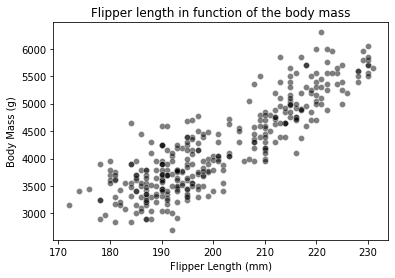

In [3]:
import seaborn as sns

feature_names = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_names]], penguins[target_name]

ax = sns.scatterplot(data=penguins, x=feature_names, y=target_name,
                     color="black", alpha=0.5)
ax.set_title("Flipper length in function of the body mass")

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last"> A função <tt class="docutils literal">scatterplot</tt> de searborn, tome como entrada o dataframe completo
e o parâmetro <tt class="docutils literal">x</tt> and <tt class="docutils literal">y</tt> permite especificar o nome das colunas para ser traçado. Observe que esta função retorna um eixo matplotlib
(named <tt class="docutils literal">ax</tt> in the example above) que pode ser usado posteriormente para adicionar elemento em
o mesmo eixo matplotlib (como um título).</p>
</div>

Nesse problema, a massa do pinguim é nosso alvo. É um contínuo
variável que varia aproximadamente entre 2700 g e 6300 g. Portanto, este é um
problema de regressão (em contraste com a classificação). Também vemos que há
quase uma relação linear entre a massa corporal do pinguim e sua
comprimento do flipper. Quanto mais comprida for a nadadeira, mais pesado será o pinguim.

Assim, poderíamos chegar a uma fórmula simples, onde dado um comprimento de flipper
poderíamos calcular a massa corporal de um pinguim usando uma relação linear
da forma `y = a * x + b` onde` a` e `b` são os 2 parâmetros do nosso
modelo.

In [4]:
def linear_model_flipper_mass(flipper_length, weight_flipper_length,
                              intercept_body_mass):
    """Linear model of the form y = a * x + b"""
    body_mass = weight_flipper_length * flipper_length + intercept_body_mass
    return body_mass

Usando o modelo que definimos acima, podemos verificar os valores de massa corporal
previsto para uma variedade de comprimentos de palheta. Vamos definir `weight_flipper_length`
para ser 45 e `intercept_body_mass` para ser -5000.

In [12]:
import numpy as np

weight_flipper_length = 45
intercept_body_mass = -5000

flipper_length_range = np.linspace(data.min(), data.max(), num=300)
predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range, weight_flipper_length, intercept_body_mass)

Agora podemos plotar todas as amostras e a previsão do modelo linear.

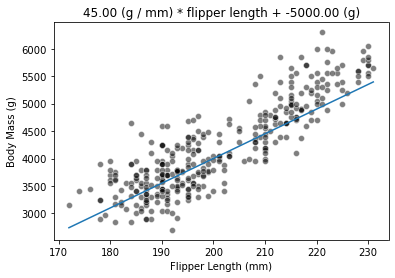

In [13]:
label = "{0:.2f} (g / mm) * flipper length + {1:.2f} (g)"

ax = sns.scatterplot(data=penguins, x=feature_names, y=target_name,
                     color="black", alpha=0.5)
ax.plot(flipper_length_range, predicted_body_mass)
_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

A variável `weight_flipper_length` é um peso aplicado ao recurso
`flipper_length` para fazer a inferência. Quando este coeficiente é
positivo, isso significa que os pinguins com nadadeiras mais compridas terão
massas corporais. Se o coeficiente for negativo, significa que os pinguins com
flipper comprimentos mais curtos têm massas corporais maiores. Graficamente, este
coeficiente é representado pela inclinação da curva no gráfico. Abaixo nós
mostrar como a curva ficaria quando o `weight_flipper_length`
coeficiente é negativo.

In [12]:
weight_flipper_length = -40
intercept_body_mass = 13000

predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range, weight_flipper_length, intercept_body_mass)

Agora podemos plotar todas as amostras e a previsão do modelo linear.

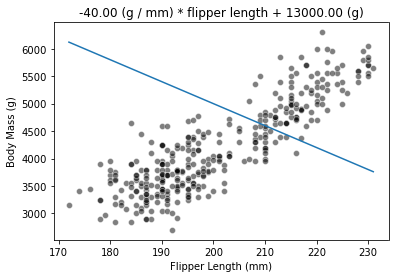

In [13]:
ax = sns.scatterplot(data=penguins, x=feature_names, y=target_name,
                     color="black", alpha=0.5)
ax.plot(flipper_length_range, predicted_body_mass)
_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

Em nosso caso, esse coeficiente tem uma unidade significativa: g / mm.
Por exemplo, um coeficiente de 40 g / mm, significa que para cada
milímetro adicional no comprimento da palheta, o peso corporal previsto será
aumentar em 40 g.

In [15]:
body_mass_180 = linear_model_flipper_mass(
    flipper_length=180, weight_flipper_length=40, intercept_body_mass=0)
body_mass_181 = linear_model_flipper_mass(
    flipper_length=181, weight_flipper_length=40, intercept_body_mass=0)

print(f"The body mass for a flipper length of 180 mm "
      f"is {body_mass_180} g and {body_mass_181} g "
      f"for a flipper length of 181 mm")

The body mass for a flipper length of 180 mm is 7200 g and 7240 g for a flipper length of 181 mm


Também podemos ver que temos um parâmetro `intercept_body_mass` em nosso modelo.
Este parâmetro corresponde ao valor no eixo y se `flipper_length = 0`
(que em nosso caso é apenas uma consideração matemática, como em nossos dados,
 o valor de `flipper_length` vai apenas de 170 mm a 230 mm). Este valor y
quando x = 0 é chamado de interceptação y. Se `intercept_body_mass` for 0, a curva
vai passar pela origem:

In [16]:
weight_flipper_length = 25
intercept_body_mass = 0

# redefined the flipper length to start at 0 to plot the intercept value
flipper_length_range = np.linspace(0, data.max(), num=300)
predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range, weight_flipper_length, intercept_body_mass)

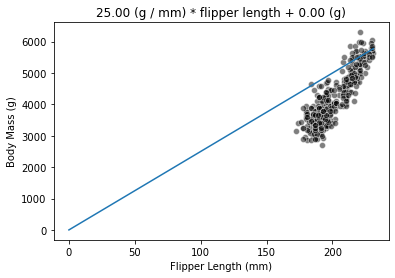

In [17]:
ax = sns.scatterplot(data=penguins, x=feature_names, y=target_name,
                     color="black", alpha=0.5)
ax.plot(flipper_length_range, predicted_body_mass)
_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

Caso contrário, passará pelo valor `intercept_body_mass`:

In [18]:
weight_flipper_length = 45
intercept_body_mass = -5000

predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range, weight_flipper_length, intercept_body_mass)

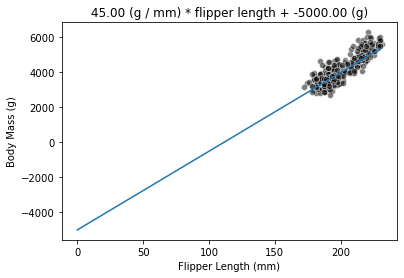

In [19]:
ax = sns.scatterplot(data=penguins, x=feature_names, y=target_name,
                     color="black", alpha=0.5)
ax.plot(flipper_length_range, predicted_body_mass)
_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

Neste caderno, vimos a parametrização de um modelo de regressão linear e o significado mais preciso dos termos pesos e interceptos.

# 📝 Exercício M4.01

O objetivo deste exercício é duplo:

* compreender a parametrização de um modelo linear;
* quantificar a precisão do ajuste de um conjunto de tais modelos.

Vamos reutilizar parte do código do curso para:

* Carregar dados;
* crie a função que representa um modelo linear.

## Pré-requisitos

### Carregando dados

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">Se você quiser uma visão geral mais aprofundada sobre este conjunto de dados, pode consultar o
Apêndice - seção de descrição dos conjuntos de dados no final deste MOOC.</p>
</div>

In [14]:
import pandas as pd

penguins = pd.read_csv("penguins_regression.csv")
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]

### Model definition

In [15]:
def linear_model_flipper_mass(
    flipper_length, weight_flipper_length, intercept_body_mass):
    """Linear model of the form y = a * x + b"""
    body_mass = weight_flipper_length * flipper_length + intercept_body_mass
    return body_mass

## Main exercise

Dado um vetor do comprimento do flipper, vários pesos e interceptações para
plotar vários modelos lineares que podem se ajustar aos nossos dados. Use o acima
função auxiliar de visualização para visualizar o modelo e os dados.

In [16]:
import numpy as np

flipper_length_range = np.linspace(data.min(), data.max(), num=300)

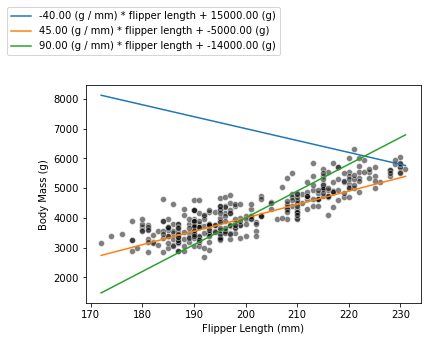

In [23]:
# solution
import matplotlib.pyplot as plt
import seaborn as sns

weights = [-40, 45, 90]
intercepts = [15000, -5000, -14000]

ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                     color="black", alpha=0.5)

label = "{0:.2f} (g / mm) * flipper length + {1:.2f} (g)"
for weight, intercept in zip(weights, intercepts):
    predicted_body_mass = linear_model_flipper_mass(
        flipper_length_range, weight, intercept)

    ax.plot(flipper_length_range, predicted_body_mass,
            label=label.format(weight, intercept))
_ = ax.legend(loc='center left', bbox_to_anchor=(-0.25, 1.25), ncol=1)

Na pergunta anterior, você foi solicitado a criar vários modelos lineares.
A visualização permitiu que você avaliasse qualitativamente se um modelo era melhor
do que outro.

Agora, você deve chegar a uma medida quantitativa que indicará o
qualidade de ajuste de cada modelo linear. Esta métrica quantitativa deve resultar
em um único escalar e permite que você escolha o melhor modelo.

In [25]:
# solution
def goodness_fit_measure(true_values, predictions):
    # we compute the error between the true values and the predictions of our
    # model
    errors = np.ravel(true_values) - np.ravel(predictions)
    # We have several possible strategies to reduce all errors to a single value.
    # Computing the mean error (sum divided by the number of element) might seem
    # like a good solution. However, we have negative errors that will misleadingly
    # reduce the mean error. Therefore, we can either square each
    # error or take the absolute value: these metrics are known as mean
    # squared error (MSE) and mean absolute error (MAE). Let's use the MAE here
    # as an example.
    return np.mean(np.abs(errors))

In [26]:
for model_idx, (weight, intercept) in enumerate(zip(weights, intercepts)):
    target_predicted = linear_model_flipper_mass(data, weight, intercept)
    print(f"Model #{model_idx}:")
    print(f"{weight:.2f} (g / mm) * flipper length + {intercept:.2f} (g)")
    print(f"Error: {goodness_fit_measure(target, target_predicted):.3f}\n")

Model #0:
-40.00 (g / mm) * flipper length + 15000.00 (g)
Error: 2764.854

Model #1:
45.00 (g / mm) * flipper length + -5000.00 (g)
Error: 338.523

Model #2:
90.00 (g / mm) * flipper length + -14000.00 (g)
Error: 573.041

